<h1>Predicitve Analysis and Customer Segmentation for an E-commerce platform</h1>

Importing Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [25]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))


<h1>Data Cleaning and Preprocessing<h1>

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h1>Exploratory Data Analysis</h1>

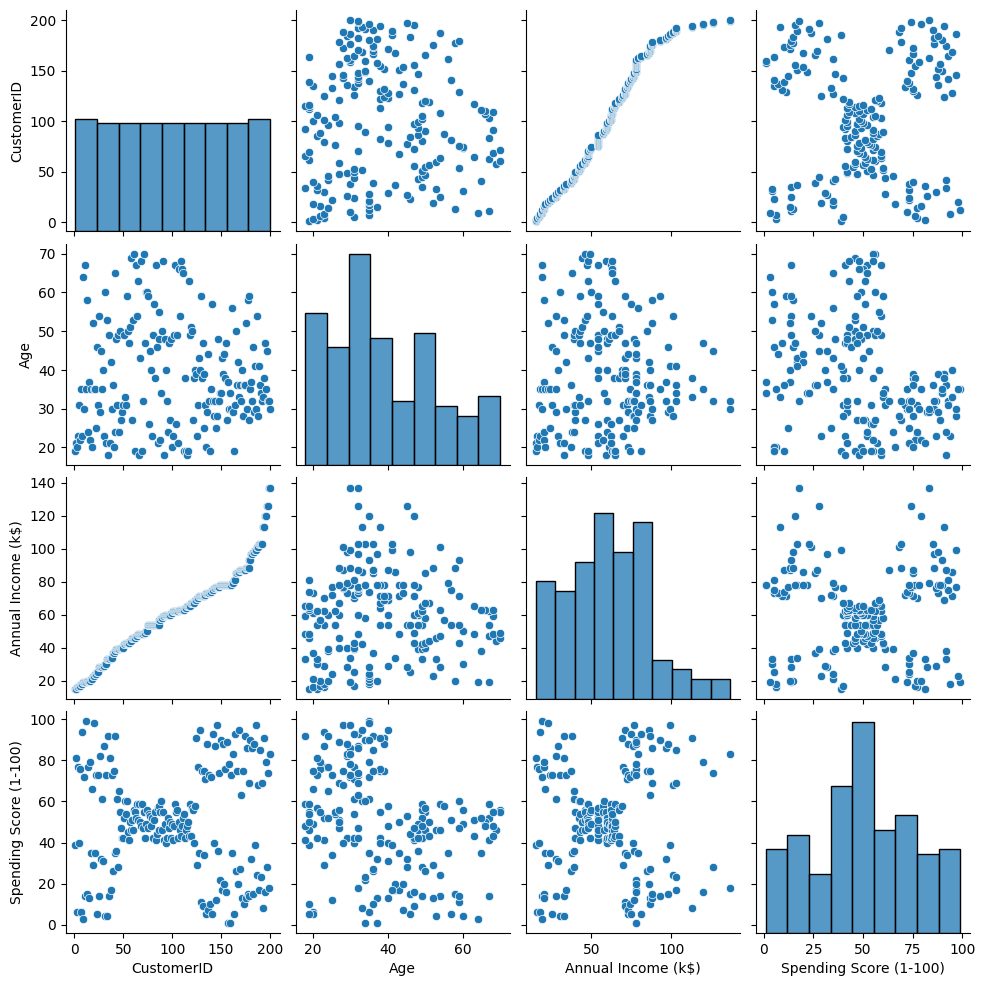

In [26]:
sns.pairplot(df)

<h1>Feature Extraction</h1>

In [8]:
bins = [0, 25, 50, 100]
labels = ['Young', 'Middle-aged', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup_Middle-aged,AgeGroup_Elderly
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,1,0


Linear Regression

In [9]:
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 480.673141707248
R-squared: 0.025478181600745997


Decision Tree regressor

In [16]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 765.9
R-squared: -0.552793771794664


In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 455.0182649645834
R-squared: 0.07749115042457333


K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


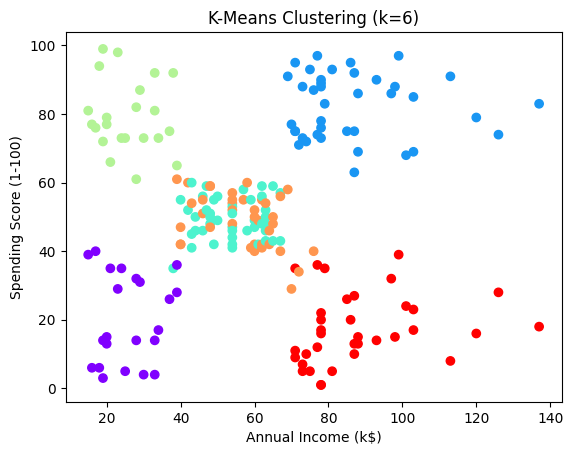

In [22]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

DBSCAN Clustering

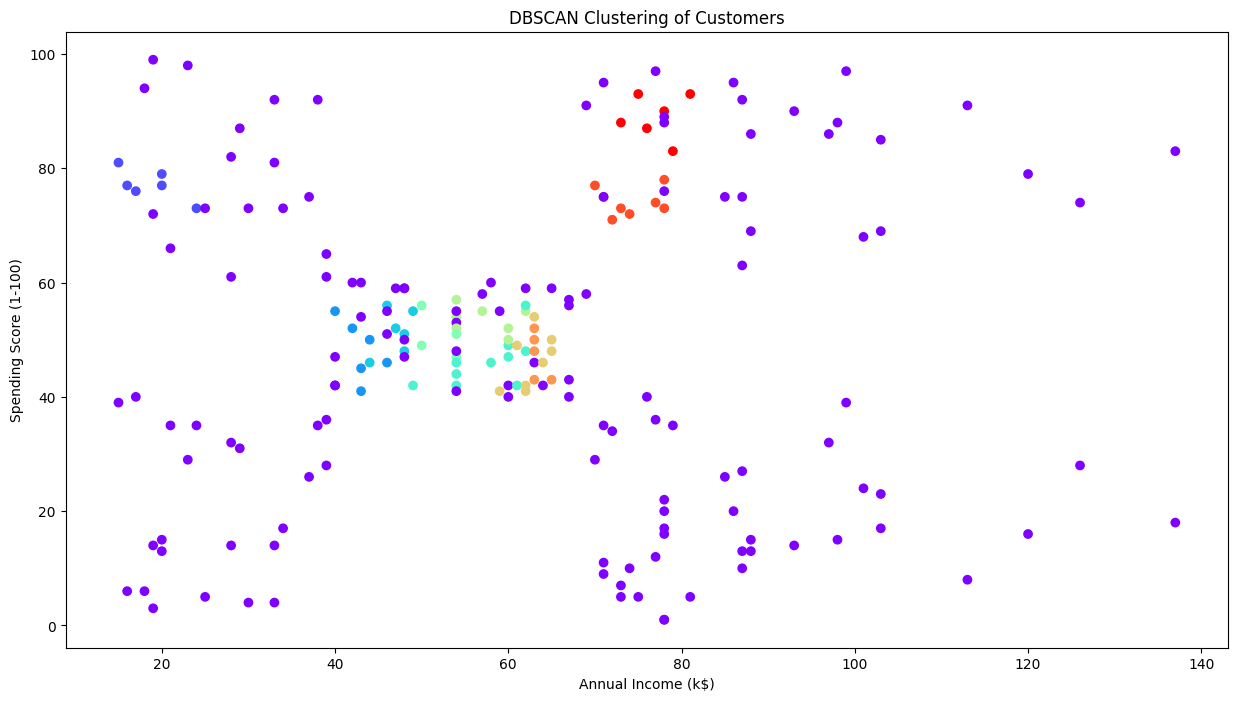

-1    134
 3     10
 6      8
 8      8
 5      7
 0      6
 1      6
 2      6
 9      6
 7      5
 4      4
Name: Cluster, dtype: int64


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
eps = 0.3
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)
df['Cluster'] = dbscan.labels_
plt.figure(figsize=(15, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering of Customers')
plt.show()
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)